In [1]:
import numpy as np
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_test = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_test

array([[4.04639249],
       [2.82174281]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b  = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_test)
y_predict

array([[4.04639249],
       [9.68987811]])

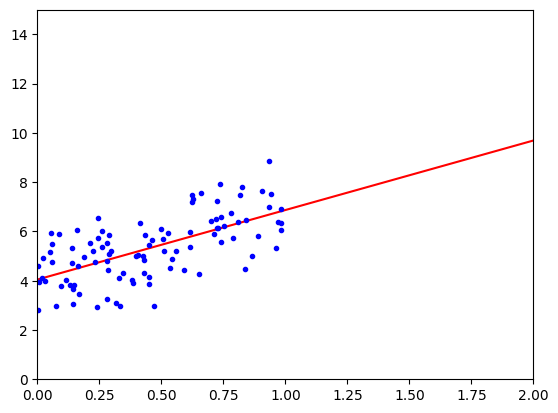

In [4]:
import matplotlib.pylab as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04639249]), array([[2.82174281]]))

In [6]:
lin_reg.predict(X_new)

array([[4.04639249],
       [9.68987811]])

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04639249],
       [2.82174281]])

In [8]:
eta = 0.1
n_iterations = 1000
m =100

theta = np.random.randn(2, 1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.04639223],
       [2.82174333]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schudelet(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        eta = learning_schudelet(epoch + m + i)
        theta = theta - eta * gradients

print(theta)

[[3.80255023]
 [2.61729419]]


In [14]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08087346]), array([2.75395096]))

Regressão Polinomial

Quando os dados não são lineares, podemos usar um modelo linear ajustado. Isso é possivel adicionando as potências de cada caracteristica como caracteristicas novas e treinar um modelo linear nesse conjunto.

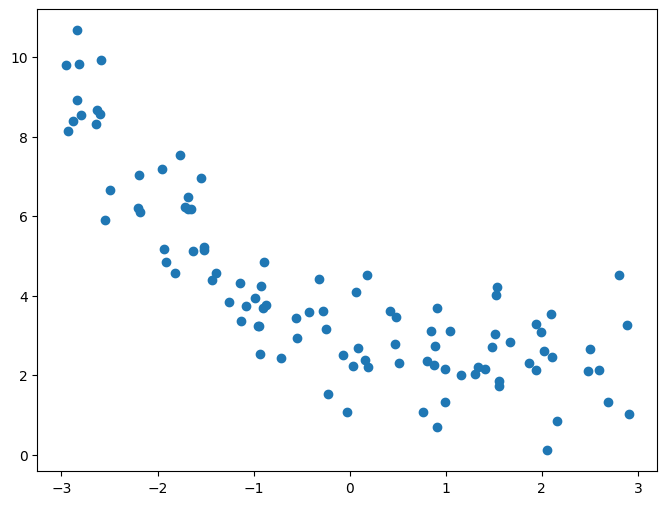

In [23]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 ** X + 2 + np.random.randn(m, 1)
plt.figure(figsize=(8, 6))
plt.scatter(X, y)

In [24]:
from  sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.51418681])

In [25]:
X_poly[0]

array([0.51418681, 0.26438807])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_




(array([2.81913587]), array([[-1.01402519,  0.37987054]]))

## Modelos Lineares Regularizados

**Regularização do modelo:** técnica utilizada para reduzir o sobreajuste do modelo, onde a complexidade do modelo é penalizada, assim, desencorajando que o modelo se ajuste demais aos dados de treinamento.